<a href="https://colab.research.google.com/github/MorphuesCrown/Tweet-Code-Test/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from itertools import combinations

In [2]:
df_following = pd.read_json('following.json')
df_engagement = pd.read_json('engagement.json')

In [3]:
df_following['follow_timestamp'] = pd.to_datetime(df_following['follow_timestamp'])
df_engagement['engaged_dt'] = pd.to_datetime(df_engagement['engaged_dt'])

In [4]:
# filter the records on April 30, 2022
df_following = df_following[df_following['follow_timestamp'].dt.date == pd.to_datetime("2022-04-30").date()]

# filter the records from April 22, 2022 to April 30, 2022
start_date = pd.to_datetime("2022-04-22").date()
end_date = pd.to_datetime("2022-04-30").date()
df_engagement = df_engagement[(df_engagement['engaged_dt'].dt.date >= start_date) & (df_engagement['engaged_dt'].dt.date <= end_date)]

In [5]:
df_following

,follower_uid,influencer_uid,follow_timestamp
37,1519447122185236480,21722318,2022-04-30 14:02:00+00:00
68,1519000321632071680,902200087,2022-04-30 15:43:39+00:00
76,1519128378170695680,15228276,2022-04-30 15:35:14+00:00
101,1106070744050606080,1090715513586679808,2022-04-30 18:59:04+00:00
108,1214256477210173440,16635277,2022-04-30 13:40:36+00:00
...,...,...,...
551043,514145421,158414847,2022-04-30 07:48:43+00:00
551044,1520527830043475968,158414847,2022-04-30 22:19:59+00:00
551107,1486927986687459328,158414847,2022-04-30 06:19:44+00:00
551114,4915176071,158414847,2022-04-30 10:17:18+00:00


In [6]:
df_engagement

,follower_uid,influencer_uid,engaged_tweetID,engaged_dt
0,1000041135396433920,1298372735383605248,1520185102143303680,2022-04-29
1,1000041135396433920,158414847,1520185102143303680,2022-04-29
2,1000041135396433920,288277167,1520185102143303680,2022-04-29
3,1000146462112665600,1022693675250249728,1518276445335961600,2022-04-24
4,1000146462112665600,10774652,1518276445335961600,2022-04-24
...,...,...,...,...
155961,999988765664993280,807095,1520185102143303680,2022-04-30
155962,999988765664993280,813286,1520185102143303680,2022-04-30
155963,999988765664993280,825476542478303232,1520185102143303680,2022-04-30
155964,999988765664993280,886398296146706432,1520185102143303680,2022-04-30


## Step 1

In [7]:
def network_overlap(infln1, infln2):

  # filter the records of influencers infln1, infln2
  fs1 = df_following[df_following['influencer_uid'] == infln1]['follower_uid']
  fs2 = df_following[df_following['influencer_uid'] == infln2]['follower_uid']

  # Compute the fraction of the overlap follower over the less followed influencer
  overlap_count = pd.Series(fs1.isin(fs2)).sum()
  less_followed = min(fs1.count(),fs2.count())
  fraction = float(overlap_count) / float(less_followed)

  return fraction

## Step 2

In [8]:
def engagement_overlap(infln1, infln2):

  # filter the records of influencers infln1, infln2
  es1 = df_engagement[df_engagement['influencer_uid'] == infln1]['follower_uid']
  es2 = df_engagement[df_engagement['influencer_uid'] == infln2]['follower_uid']

  # Compute the fraction of the overlap engager over the less engaged influencer
  overlap_count = pd.Series(es1.isin(es2)).sum()
  less_engaged = min(es1.count(),es2.count())
  fraction = float(overlap_count) / float(less_engaged)
  
  return fraction



## Step 3

In [17]:
# create influencer series
f_influencer_series = pd.Series(df_following['influencer_uid'].values)
f_influencer_series = f_influencer_series.drop_duplicates()
f_influencer_series

0                   21722318
1                  902200087
2                   15228276
3        1090715513586679808
4                   16635277
                ...         
12869                 813286
15524              158414847
15718               15327996
15945               14594876
15998    1428799137286434816
Length: 85, dtype: int64

In [18]:
e_influencer_series = pd.Series(df_engagement['influencer_uid'].values)
e_influencer_series = e_influencer_series.drop_duplicates()
e_influencer_series

0        1298372735383605248
1                  158414847
2                  288277167
3        1022693675250249728
4                   10774652
                ...         
36377              379406248
45503    1150981776631746560
51756             3409303372
72148               16479381
79265    1238141662284546048
Length: 99, dtype: int64

In [19]:
# get all unordered pairs
f_pairs = list(combinations(f_influencer_series, 2))
e_pairs = list(combinations(e_influencer_series, 2))

# store all pairs in Dataframe
df_f_pairs = pd.DataFrame(f_pairs, columns=['influencer_1', 'influencer_2'])
df_e_pairs = pd.DataFrame(e_pairs, columns=['influencer_1', 'influencer_2'])


In [25]:
# compute overlaps
df_f_pairs['network_overlap'] = df_f_pairs.apply(lambda r: network_overlap(r['influencer_1'], r['influencer_2']), axis=1)
df_e_pairs['engagement_overlap'] = df_e_pairs.apply(lambda r: engagement_overlap(r['influencer_1'], r['influencer_2']), axis=1)

In [35]:
df_f_pairs

,influencer_1,influencer_2,network_overlap
0,21722318,902200087,0.222222
1,21722318,15228276,0.000000
2,21722318,1090715513586679808,0.000000
3,21722318,16635277,0.000000
4,21722318,1445858534143500288,0.000000
...,...,...,...
3565,158414847,14594876,0.000000
3566,158414847,1428799137286434816,0.000000
3567,15327996,14594876,0.000000
3568,15327996,1428799137286434816,0.000000


In [36]:
df_e_pairs

,influencer_1,influencer_2,engagement_overlap
0,1298372735383605248,158414847,0.539865
1,1298372735383605248,288277167,0.633669
2,1298372735383605248,1022693675250249728,0.027744
3,1298372735383605248,10774652,0.049481
4,1298372735383605248,1082197856,0.050731
...,...,...,...
4846,1150981776631746560,16479381,0.000000
4847,1150981776631746560,1238141662284546048,0.000000
4848,3409303372,16479381,0.000000
4849,3409303372,1238141662284546048,0.000000


In [31]:
# Use Plotly to plot the histograms
import plotly.graph_objects as go

# Create histogram trace
histogram1 = go.Histogram(x=df_f_pairs.index, y=df_f_pairs['network_overlap'])
histogram2 = go.Histogram(x=df_e_pairs.index, y=df_e_pairs['engagement_overlap'])

# Create a layout
layout1 = go.Layout(title="Network Histogram", xaxis=dict(title="Index"), yaxis=dict(title="Network Overlap"))
layout2 = go.Layout(title="Engagement Histogram", xaxis=dict(title="Index"), yaxis=dict(title="Engagement Overlap"))

# Create figures and add the histogram trace
fig1 = go.Figure(data=[histogram1], layout=layout1)
fig2 = go.Figure(data=[histogram2], layout=layout2)

# Display the figure
fig1.show()
fig2.show()

## Step 5

In [58]:
# Create a new column with sorted values for each DataFrame
df_f_pairs['sorted_pairs'] = df_f_pairs.apply(lambda row: tuple(sorted([row['influencer_1'], row['influencer_2']])), axis=1)
df_e_pairs['sorted_pairs'] = df_e_pairs.apply(lambda row: tuple(sorted([row['influencer_1'], row['influencer_2']])), axis=1)

# Concatenate the DataFrames based on the sorted pairs
concatenated_df = pd.merge(df_f_pairs, df_e_pairs, left_on='sorted_pairs', right_on='sorted_pairs')
concatenated_df = concatenated_df.dropna()
concatenated_df = concatenated_df[['sorted_pairs','network_overlap','engagement_overlap']]

In [59]:
concatenated_df

,sorted_pairs,network_overlap,engagement_overlap
0,"(21722318, 902200087)",0.222222,0.476672
1,"(15228276, 21722318)",0.000000,0.050898
2,"(21722318, 1090715513586679808)",0.000000,0.006221
3,"(16635277, 21722318)",0.000000,0.020218
4,"(21722318, 1445858534143500288)",0.000000,0.011111
...,...,...,...
3481,"(813286, 15327996)",0.000000,0.921288
3482,"(813286, 1428799137286434816)",0.000000,0.125000
3483,"(15327996, 158414847)",0.000000,0.740608
3484,"(158414847, 1428799137286434816)",0.000000,0.000000


In [60]:
# Extract predictor and response variables
X = concatenated_df['network_overlap']
y = concatenated_df['engagement_overlap']

In [61]:
import statsmodels.api as sm

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
beta0 = results.params[0]
beta1 = results.params[1]
se = results.bse[1]

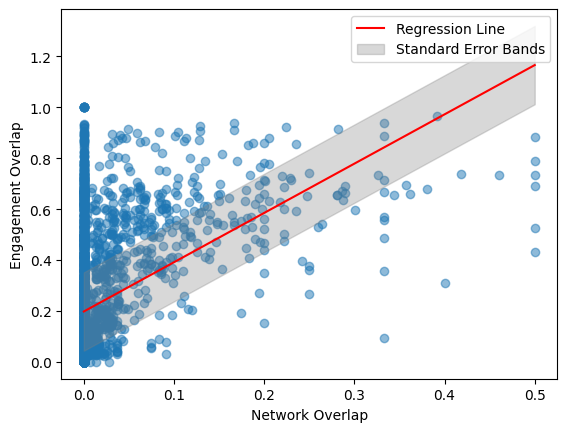

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of the data
plt.scatter(concatenated_df['network_overlap'], concatenated_df['engagement_overlap'], alpha=0.5)

# Regression line
x_vals = np.linspace(concatenated_df['network_overlap'].min(), concatenated_df['network_overlap'].max(), 100)
y_vals = beta0 + beta1 * x_vals
plt.plot(x_vals, y_vals, color='red', label='Regression Line')

# Standard error bands
y_upper = y_vals + 1.96 * se
y_lower = y_vals - 1.96 * se
plt.fill_between(x_vals, y_lower, y_upper, color='gray', alpha=0.3, label='Standard Error Bands')

# Labels and legend
plt.xlabel('Network Overlap')
plt.ylabel('Engagement Overlap')
plt.legend()

# Display the plot
plt.show()